# Group Generator

## Overview

#### INPUT:

CSV of students with their available meeting times and preferred partners
<br>(and accompanying column names, keywords, and similar information).

#### BLACK BOX:

(See Methodology, below.)

#### OUTPUT:

Optimally sized groups which share a common meeting time and includes preferred partners whenever possible.


### Methodology

We use an adapted version of the following:

https://stackoverflow.com/questions/67391919/algorithm-to-group-people-together-based-on-their-available-timeslots-calendar


Based on the number of students you have and the maximum number of groups you would like formed, calculate the optimal group sizes.

For each student, record which time slots are marked available and which partners are preferred.
<br>Sort students from the least number of availabilities to the most.

For each time slot, record how many students are available at that time.
<br>Sort time slots from the least number of availabilities to the most.

We connect students with their preferred partners; considering connections as transitive, we form connected components.
<br>(Try to keep the connected components as large as possible, but especially try to keep the double-connections where two students both request to work with the other.)

Execute the following pseudocode:

`                                                                                                                                               `
>
while not an impossible grouping:
<br>>>
remove 0, or 1, or 2, or... weak/single connections in order to make student groups more flexible
<br>>>
if all weak/single connections are removed:
<br>>>>
remove 0, or 1, or 2, or... strong/double connections in order to make student groups more flexible
<br>>>
group the (smaller) connected components into Group 1, Group 2, ...
<br>>>
fill Group 1, Group 2, ... with students who have few available times first, then with students who have many available times, as needed
<br>(any student who cannot fit into an already established group goes on to establish a new group)
>>
if the number of groups exceeds the maximum number acceptable, or if a group size is too small/large:
<br>>>>
this grouping is considered impossible and we will retry by removing even more connections than on this try
<br>>
if that fails:
<br>>>
randomly shuffle students/time slot and try the while loop again
<br>>
if every attempt has still failed:
<br>>>
accept the best recorded attempt

`                                                                                                                                               `



######

***

## INPUT:

In [1]:
def Item(in_int, in_str):
    return print('\n'*2 + ' '*4 + str(in_int) + '. ' + in_str)

def Subitem(in_str):
    return print(' '*7 + in_str)

def Input():
    return input('\n' + 'YOUR RESPONSE:')

true = ['t', 'r', 'u', 'y']
def Test_Truth(in_str):
    return True in [x in in_str for x in true]

def Get_Input_Number():
    num = Input()
    is_num = False
    it = 0
    while is_num == False and it < 100:
        try:
            num = int(num)
            is_num = True
            print()
            Subitem('Input accepted!'.format(num))
        except:
            print('ERROR: Your entry must be an integer; please try again.')
            num = Input()
    return num

def Get_Input_List():
    num = Get_Input_Number()
    lst = []
    for i in range(num):
        lst.append(Input())
    return lst

def Get_Manual_Inputs():
    Item(3, 'Type in the number of column names you will use to identify your students, followed by the column name(s); do this one at a time, hitting Enter/Return each time.')
    Subitem("(At AI4ALL, we use: 2, First Name, Last Name.)")
    student_identifiers = Get_Input_List()
    #
    Item(4, 'Type in the name of the column which indicates the partner(s) students wish to work with (if no such column exists, type False).')
    Subitem('(At AI4ALL, we use: Are there any particular students with whom you would like to be in the same group? If so, indicate their names below. Please note that we cannot guarantee you will be in the same group as them, but we will do our best to honor your request.)')
    student_preferred_partners = Input()
    #
    Item(5, 'Type in the number of weekdays students may choose to meet, followed by the weekday(s).')
    Subitem("(At AI4ALL, we use: 7, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday.)")
    available_days = Get_Input_List()
    #
    Item(6, 'Type in the number of time slots students may choose to meet, followed by the time slot(s).')
    Subitem("(At AI4ALL, we use: 3, Morning, Afternoon, Evening.)")
    available_times = Get_Input_List()
    #
    Item(7, 'Type in the maximum number of groups you would like formed.')
    Subitem('(At AI4ALL, we use: 9.)')
    max_num_groups = Get_Input_Number()
    #
    return [student_identifiers, student_preferred_partners, available_days, available_times, max_num_groups]



Item(0, 'To begin, upload your CSV into your Python/Jupyter workspace.')
Subitem('If you have not done so already, please follow the instructions:')
Subitem('Stop the kernel > upload your CSV > restart the kernel.')
Subitem("(At AI4ALL, we use the COE Responses sheet from our school's roster.)")

Item(1, 'Type in the name of your CSV (mine is named SAMPLE_Roster.csv).')
CSV_directory = Input()
admin = CSV_directory
if admin == 'admin':
    want_to_test = True
    want_to_plot = True
    want_no_warn = True
    CSV_directory = 'SAMPLE_Roster.csv'
    AI4ALL = True
    autofill = True
elif admin == 'adminn':
    want_to_test = False
    want_to_plot = False
    want_no_warn = True
    CSV_directory = 'SAMPLE_Roster.csv'
    AI4ALL = True
    autofill = True
else:
    want_to_test = False
    want_to_plot = False
    want_no_warn = False
Item(2, 'True or False:  You work for AI4ALL (as a Discover AI Instructor).')
print()
try:
    AI4ALL
except:
    AI4ALL = Test_Truth(Input())
if AI4ALL:
    Subitem('It has been determined that you work for AI4ALL!')
    Subitem('As such, this program will autofill the remaining variables for you.')
    Subitem('True or False:  You want to continue with this autofill.')
    try:
        autofill
    except:
        autofill = Test_Truth(Input())
    if autofill:
        Subitem('It has been determined that you want to use autofill!')
        student_identifiers = ['First Name', 'Last Name']
        student_preferred_partners = 'Are there any particular students with whom you would like to be in the same group? If so, indicate their names below. Please note that we cannot guarantee you will be in the same group as them, but we will do our best to honor your request.'
        available_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        available_times = ['Morning', 'Afternoon', 'Evening']
        max_num_groups = 9
    else:
        Subitem('It has been determined that you do not want to use autofill.')
        student_identifiers, student_preferred_partners, available_days, available_times, max_num_groups = Get_Manual_Inputs()
else:
    Subitem('It has been determined that you do not work for AI4ALL.')
    student_identifiers, student_preferred_partners, available_days, available_times, max_num_groups = Get_Manual_Inputs()



    0. To begin, upload your CSV into your Python/Jupyter workspace.
       If you have not done so already, please follow the instructions:
       Stop the kernel > upload your CSV > restart the kernel.
       (At AI4ALL, we use the COE Responses sheet from our school's roster.)


    1. Type in the name of your CSV (mine is named SAMPLE_Roster.csv).



YOUR RESPONSE: SAMPLE_Roster.csv




    2. True or False:  You work for AI4ALL (as a Discover AI Instructor).




YOUR RESPONSE: True


       It has been determined that you work for AI4ALL!
       As such, this program will autofill the remaining variables for you.
       True or False:  You want to continue with this autofill.



YOUR RESPONSE: no


       It has been determined that you do not want to use autofill.


    3. Type in the number of column names you will use to identify your students, followed by the column name(s); do this one at a time, hitting Enter/Return each time.
       (At AI4ALL, we use: 2, First Name, Last Name.)



YOUR RESPONSE: word


ERROR: Your entry must be an integer; please try again.



YOUR RESPONSE: ahh


ERROR: Your entry must be an integer; please try again.



YOUR RESPONSE: 2



       Input accepted!



YOUR RESPONSE: First Name

YOUR RESPONSE: Last Name




    4. Type in the name of the column which indicates the partner(s) students wish to work with (if no such column exists, type False).
       (At AI4ALL, we use: Are there any particular students with whom you would like to be in the same group? If so, indicate their names below. Please note that we cannot guarantee you will be in the same group as them, but we will do our best to honor your request.)



YOUR RESPONSE: Are there any particular students with whom you would like to be in the same group? If so, indicate their names below. Please note that we cannot guarantee you will be in the same group as them, but we will do our best to honor your request.




    5. Type in the number of weekdays students may choose to meet, followed by the weekday(s).
       (At AI4ALL, we use: 7, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday.)



YOUR RESPONSE: word


ERROR: Your entry must be an integer; please try again.



YOUR RESPONSE: ahh


ERROR: Your entry must be an integer; please try again.



YOUR RESPONSE: 7



       Input accepted!



YOUR RESPONSE: Monday

YOUR RESPONSE: Tuesday

YOUR RESPONSE: Wednesday

YOUR RESPONSE: Thursday

YOUR RESPONSE: Friday

YOUR RESPONSE: Saturday

YOUR RESPONSE: Sunday




    6. Type in the number of time slots students may choose to meet, followed by the time slot(s).
       (At AI4ALL, we use: 3, Morning, Afternoon, Evening.)



YOUR RESPONSE: word


ERROR: Your entry must be an integer; please try again.



YOUR RESPONSE: ahh


ERROR: Your entry must be an integer; please try again.



YOUR RESPONSE: 3



       Input accepted!



YOUR RESPONSE: Morning

YOUR RESPONSE: Afternoon

YOUR RESPONSE: Evening




    7. Type in the maximum number of groups you would like formed.
       (At AI4ALL, we use: 9.)



YOUR RESPONSE: word


ERROR: Your entry must be an integer; please try again.



YOUR RESPONSE: ahh


ERROR: Your entry must be an integer; please try again.



YOUR RESPONSE: 9



       Input accepted!


######

***

## BLACK BOX:

### Imports

#### Required

In [2]:
import pandas as pd # work with DataFrames
import numpy as np # return unique elements of a list
import string # format student identifier
import networkx as nx # easily connect students with their preferred partners
import itertools as itr # create multiple backup group assignments

#### Optional

In [3]:
want_to_test=False
want_to_plot=True
want_no_warn=True

if want_to_test:
    import random as rand

if want_to_plot:
    import matplotlib.pyplot as plt 
    import pylab as plt

if want_no_warn:
    import warnings
    warnings.simplefilter('error', UserWarning)
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.filterwarnings(action="ignore", category=DeprecationWarning)

### Functions

#### Variables

In [4]:
timeslots = [' '.join(x) for x in itr.product(available_days, available_times)]

ind_p = 1 # 'Partners'
ind_t = 2 # First Time slot
ind_ts = -3 # 'Time slots'

Mng = max_num_groups

#### Standard

In [5]:
def Unique(in_list=[]):
    return list(np.unique(np.array(in_list)))

def Sort(in_list=[]):
    in_list.sort()
    return in_list

#### Preparing my CSV

In [6]:
# Given user-input preferred partners, match them to formatted students
def Format_Partners(in_df):
    df = in_df.copy()
    for c, to_scan in enumerate(df['Partners']):
        to_scan = str(to_scan).lower() # user-input string, may contain errors
        scan_results = ''
        for student in df['Student']:
            student = [x.lower() for x in student.split(' ')]
            student[-1] = ' ' + student[-1]
            if True in [x in to_scan for x in student]:
                scan_results = scan_results + ', '*min(1, len(scan_results)) + string.capwords(' '.join(student))
            else:
                pass
        df.iloc[c, ind_p] = ', '.join(Sort(Unique(scan_results.split(', '))))
    return df

# Separate Day-[Morning, Afternoon, Evening] into [Day-Morning, Day-Afternoon, Day-Evening]
def Format_Timeslots(in_DF, in_df):
    DF = in_DF.copy()
    df = in_df.copy()
    for t in timeslots:
        s = t.split(' ')
        df[t] = DF[s[0]].str.contains(s[1])
        df = df.fillna(0)
        df[t] = [int(j) for j in df[t]]
    return df

# Reorder time slot based on scarcity of students able to meet at that time
def Reorder_Timeslots_df(in_ts_df, in_random=False):
    timeslots_df = in_ts_df
    timeslots_df.loc['Total']= timeslots_df.sum()
    if in_random == False:
        timeslots_df = timeslots_df.sort_values('Total', axis=1)
    elif in_random:
        timeslots_df = timeslots_df.sort_values('Total', axis=1, key=lambda row: row.map(lambda x: rand.random()))
    else:
        timeslots_df = timeslots_df.sort_values('Total', axis=1, key=lambda row: row.map(lambda x: -x))
    return timeslots_df

#### Preparing to form new DataFrame

In [7]:
# For a student, record which time slots are marked as available
def Get_Student_Timeslots(in_df, in_sid=0):
    spread_timeslots = in_df.iloc[in_sid, ind_t:].tolist() # list of 0s and 1s
    concise_timeslots = [str(i) for i in range(len(timeslots)) if spread_timeslots[i] == 1] # list of strings of the indices of working timeslots
    return ', '.join(concise_timeslots) # string of the indices of working timeslots, separated by commas

def Timeslots_Col(in_df):
    return [Get_Student_Timeslots(in_df, sid) for sid in range(in_df.shape[0])]

#### Form new DataFrame

In [8]:
def DF(in_directory=CSV_directory, in_random=False):
    DF = pd.read_csv(in_directory).dropna(axis=0, subset=student_identifiers).astype(str) # user-input CSV
    #
    df = pd.DataFrame() # we will make a clean DataFrame with only the information we need
    df['Student'] = DF[student_identifiers].apply(' '.join, axis=1) # combines First Last names
    try:
        df['Partners'] = DF.loc[:, student_preferred_partners] # adds student-input partner preferences (assuming 'student_preferred_partners' was entered correctly)
    except:
        df['Partners'] = ['' for i in range(DF.shape[0])]
    #
    df = Format_Partners(df) # format student-input partner preferences
    df = Format_Timeslots(DF, df) # adds a column for each time slot
    timeslots_df = df.iloc[:, ind_t:] # takes the timeslot columns...
    timeslots_df = Reorder_Timeslots_df(timeslots_df, in_random) # ... and reorders them
    df = df[list(df.columns[: ind_t]) + list(timeslots_df.columns)] # puts the reordered version back into the DataFrame 'df'
    #
    df['Time slots'] = Timeslots_Col(df) # records all available time slots for the student, taking into account the reordering
    df['Flexibility'] = df.iloc[:, ind_t:].sum(axis=1)
    df = df.sort_values('Flexibility').reset_index(drop=True) # less flexible students will be grouped ASAP
    df['Group'] = [0 for i in range(df.shape[0])] # this will be updated
    return [DF, df, timeslots_df]

timeslots = list(DF()[2].columns) # updates the timeslot reordering

#### Students

In [9]:
def Students(in_df=DF()[1]):
    return in_df.loc[:, 'Student'].tolist() # turns the 'Student' column of 'df' into a list; this column was reordered, earlier.

def Num_Students(in_students=Students()):
    return len(in_students)

def SID(in_student, in_students=Students()):
    return in_students.index(in_student)

#### Calculate optimal group sizes (5-6, with special allowances of 4 or 7)

In [10]:
def Group_Sizes(in_num_students=Num_Students()):
    num_students = in_num_students
    mgs = 5 # min group size
    png = num_students//mgs # possible number of groups
    group_sizes = [mgs for i in range(png)]
    it = 0
    while png > Mng and it < png:
        png -= 1
        it += 1
        group_sizes = [x + 1 for x in group_sizes[:-1]]
    s = sum(group_sizes)
    it = 0
    while s < num_students and it < png:
        group_sizes[it] = group_sizes[it] + 1
        it += 1
        s = sum(group_sizes)
    it = 0
    while s > num_students and it < png:
        group_sizes[png - 1 - it] = group_sizes[png - 1 - it] - 1
        it += 1
        s = sum(group_sizes)
    it = 0
    if s < num_students:
        group_sizes = [mgs - 1 for i in range(png + 1)]
        while s < num_students and it < png:
            group_sizes[it] = group_sizes[it] + 1
            it += 1
            s = sum(group_sizes)
    return group_sizes

def Num_Groups(in_groups=Group_Sizes()):
    return len(in_groups)

#### Connect students with their preferred partners

http://courses.ics.hawaii.edu/ReviewICS241/morea/graphs/Graphs4-QA.pdf

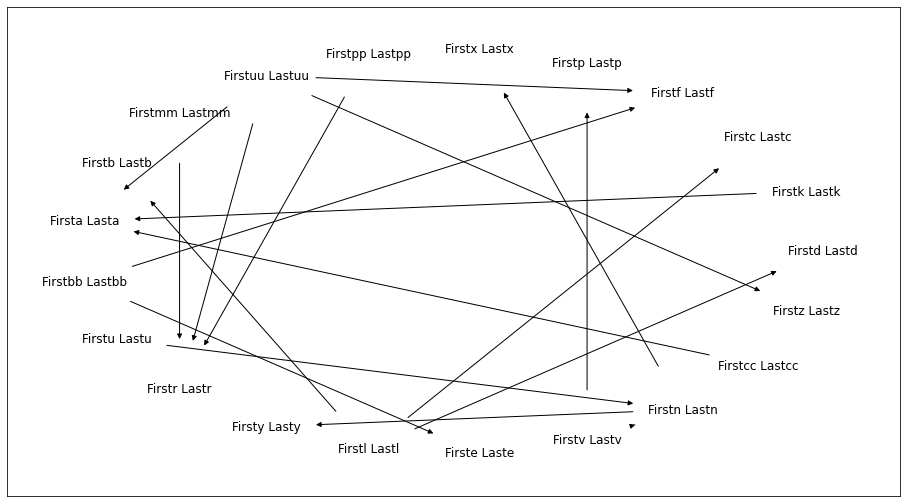




Connected components "cc": [{'Firstbb Lastbb', 'Firstk Lastk', 'Firstr Lastr', 'Firstf Lastf', 'Firsta Lasta', 'Firstpp Lastpp', 'Firstuu Lastuu', 'Firste Laste', 'Firstmm Lastmm', 'Firstcc Lastcc', 'Firstz Lastz'}, {'Firstd Lastd', 'Firstb Lastb', 'Firstl Lastl', 'Firstc Lastc'}, {'Firstu Lastu', 'Firstp Lastp', 'Firstx Lastx', 'Firsty Lasty', 'Firstv Lastv', 'Firstn Lastn'}]

Strongly connected components "dd": []





In [11]:
def Partners_Graph(in_df=DF()[1], in_cc=False, in_draw=False):
    df = in_df.copy()
    D = nx.DiGraph()
    nodes = Students(df)
    STUDENTS = nodes.copy()
    D.add_nodes_from(nodes)
    D.add_edges_from([x for x in itr.product(nodes, nodes) if df.iloc[SID(x[1], STUDENTS), 0] in df.iloc[SID(x[0], STUDENTS), ind_p]])
    #
    CC = nx.weakly_connected_components(D) # connected components of undirected graph
    if in_cc != False:
        cc = in_cc
    else:
        cc = [x for x in CC if len(x) > 1] # gets rid of isolated vertices/nodes
    #
    DD = nx.strongly_connected_components(D) #
    dd = [x for x in DD if len(x) > 1] # and x not in cc
    #
    if in_draw:
        D = nx.DiGraph()
        try:
            nodes = list(set.union(*cc))
        except:
            nodes = []
        D.add_nodes_from(nodes)
        D.add_edges_from([x for x in itr.product(nodes, nodes) if df.iloc[SID(x[1], STUDENTS), 0] in df.iloc[SID(x[0], STUDENTS), ind_p]])
        plt.figure(3,figsize=(16,9)) 
        nx.draw_networkx(D, pos=nx.circular_layout(D), node_size=10000, node_color='None', arrowsize=10, with_labels=True)
        plt.show()
    return [CC, cc, DD, dd]

if want_to_plot:
    PG = Partners_Graph(in_draw=want_to_plot)
    cc, dd = PG[1], PG[3]
    print('\n'*2)
    print('Connected components "cc":', cc)
    print()
    print('Strongly connected components "dd":', dd)
    print('\n'*2)

#### Generate Groups

In [12]:
def Timeslot_Buddies(in_df=DF()[1], in_num_students=Num_Students()): # for each time slot, records who is available then
    return [{in_df.iloc[sid, 0] for sid in range(in_num_students) if in_df.iloc[sid, ind_t + i] == 1} for i in range(len(timeslots))]

def Timeslot_Partners(in_df=DF()[1], in_source=Partners_Graph()[1]):
    df = in_df
    num_students = Num_Students(df)
    timeslot_buddies = Timeslot_Buddies(df, num_students) # for each time slot, records which partners are available then
    return [[x.intersection(timeslot_buddies[i]) for x in in_source] for i in range(len(timeslot_buddies))]

In [13]:
def Try_Group_Partners(in_df=DF()[1], in_source=Partners_Graph()[1]): # This doesn't take partial groups, it tries to make whole components work. It tells us 
    df = in_df
    xx = in_source # these are the partners we want to work
    x_timeslot_partners = Timeslot_Partners(df, xx) # these are the actual
    out = []
    for [x, y] in itr.product(xx, x_timeslot_partners):
        try:
            y.index(x)
            out.append(x)
        except:
            pass
    return Unique(out)

def Start_Form_Groups(in_df=DF()[1], in_sources=[Partners_Graph()[1], Partners_Graph()[3]]):
    df = in_df
    num_students = Num_Students(df)
    timeslot_buddies = Timeslot_Buddies(df, num_students)
    #
    cc, dd = in_sources[0].copy(), in_sources[1].copy()
    # 
    best_timeslot_partners = Try_Group_Partners(df, cc) # TRIES TO GET ALL OF cc
    for b in best_timeslot_partners:
        try:
            cc.remove(b)
        except:
            print('Something weird happened with {} not being in {}.'.format(b,cc)) 
            pass
    #
    try:
        u = set.union(*best_timeslot_partners)
    except:
        u = set()
    remaining = [x.difference(u) for x in cc] # the remaining members with preferred partners indicated
    #
    # Try to fit at least some remaining partners together
    r_timeslot_partners = Timeslot_Partners(df, remaining)
    r = len(remaining)
    R = range(r)
    it = 0
    while r > 0 and it < 100:
        it += 1
        options = [[len(x[i]) for i in R] for x in r_timeslot_partners]
        option_slices = [[x[i] for x in options] for i in R]
        best_options = [x.index(max(x)) for x in option_slices]
        for i in R:
            best_timeslot_partners.append(remaining[i].intersection(r_timeslot_partners[best_options[i]][i]))
        try:
            remaining = Unique([x.difference(set.union(*best_timeslot_partners)) for x in remaining])
            remaining.remove(set())
        except:
            pass
        r_timeslot_partners = [[r.intersection(timeslot_buddies[i]) for r in remaining] for i in range(len(timeslots))]
        r = len(remaining)
        R = range(r)
    best_timeslot_partners = [x for i, x in enumerate(best_timeslot_partners) if i == best_timeslot_partners.index(x)] # Unique(best_timeslot_partners)
    best_timeslot_partners = [x for x in best_timeslot_partners if len(x) > 1] # Unique(best_timeslot_partners)
    #
    best_timeslot_partners_tps = [[b.intersection(timeslot_buddies[i]) for b in best_timeslot_partners] for i in range(len(timeslots))] # for each broken connected component chunk, for each timeslot see how many timeslots work for that chunk
    btptps = [] # these will be the indices/timeslots for the partners
    for x in best_timeslot_partners:
        t = []
        for y in best_timeslot_partners_tps:
            try:
                y.index(x)
                t.append(best_timeslot_partners_tps.index(y))
            except:
                pass
        btptps.append(t[0])
    groups = [list(x) for _, x in sorted(zip(btptps, best_timeslot_partners))]
    best_timeslot_partners = [set(x) for x in groups]
    btptps.sort()
    GROUP_SIZES = Group_Sizes() # the desired group sizes
    for i in range(len(GROUP_SIZES) - len(groups)):
        groups.append([]) # preparing to fill in future groups
    group_sizes = [len(x) for x in groups]
    #
    # Update the df with their group number
    group_num = 1
    for group in best_timeslot_partners:
        if group_num <= Mng:
            for student in group:
                sid = SID(student, Students(df))
                df.iloc[sid, -1] = group_num
            group_num += 1
        else:
            pass
    return [best_timeslot_partners, btptps]

def Finish_Form_Groups(in_df=DF()[1], in_btp=Start_Form_Groups()[0], in_btptps=Start_Form_Groups()[1], in_combination=set(), in_print=True):
    df = in_df
    num_students = Num_Students(df)
    GROUP_SIZES = Group_Sizes(num_students) # the desired group sizes
    best_timeslot_partners, btptps = in_btp, in_btptps
    GROUPS = [x.difference(in_combination) for x in best_timeslot_partners] # on most iterations we will remove connections between preferred partners
    groups = [list(x) for x in GROUPS if len(x) > 1]
    best_timeslot_partners = [set(x) for x in groups]
    btptps = [btptps[i] for i in range(len(btptps)) if len(GROUPS[i]) > 1]
    groups = [list(x) for _, x in sorted(zip(btptps, groups))]
    btptps.sort()
    for i in range(len(GROUP_SIZES) - len(groups)):
        groups.append([])
    group_sizes = [len(x) for x in groups]
    #
    try:
        u = set.union(*GROUPS) # all of the (reduced) partners with preferences
    except:
        u = set()
    students = [x for x in df.iloc[:, 0] if x not in u] # the remaining students to be trickled in with the preferred partners
    STUDENTS = Students(df) # the actual students list for correct sid
    it = 0
    if in_print:
        print()
    for student in students:
        sid = SID(student, STUDENTS)
        s_times = [int(x) for x in df.iloc[sid, ind_ts].split(', ')] # the times the student is available
        truth = False
        #
        for t in s_times:
            try:
                ind_b = btptps.index(t) # check if the student's timeslot matches the optimal timeslot for the groups (careful if btptps has repeats)
                group_size_check = group_sizes[ind_b] == GROUP_SIZES[ind_b]
                gsc_it = 0
                while gsc_it < 100 and group_size_check:
                    gsc_it += 1
                    btptps[ind_b] = -gsc_it # a number which is not an actual timeslot
                    try:
                        ind_b = btptps.index(t)
                        group_size_check = group_sizes[ind_b] == GROUP_SIZES[ind_b]
                    except:
                        break
                if truth == False and group_sizes[ind_b] < GROUP_SIZES[ind_b]:
                    groups[ind_b].append(student)
                    group_sizes[ind_b] = group_sizes[ind_b] + 1
                    group_num = ind_b + 1
                    df.iloc[sid, -1] = group_num
                    truth = True
                    if in_print:
                        print('"Into a group!"  student, s_times, btptps', ' '*10, student, s_times, btptps)
                    else:
                        pass
                else:
                    pass
            except:
                pass
        #
        if truth == False: # if the student didn't fit in, form a new group
            if in_print:
                print('"Try forming a new group..."  student, s_times', ' '*5, student, s_times)
            else:
                pass
            try:
                group_num = groups.index([])
                groups[group_num].append(student)
                group_sizes[group_num] = group_sizes[group_num] + 1
            except:
                groups.append([student])
                group_num = len(groups) - 1
                group_sizes.append(1)
                btptps.append(s_times[0])
            df.iloc[sid, -1] = group_num + 1
            if len(btptps) < len(groups):
                btptps.append(s_times[0])
            else:
                pass
    #
    if in_print:
        print()
        for i in range(len(groups)):
            print(group_sizes[i], groups[i])
        print(sum(group_sizes))
        print(GROUP_SIZES)
        print('\n'*2)
    return [groups, group_sizes]



def Form_Groups(in_df=DF()[1], in_random=False, in_combination=set(), in_print=False):
    df = in_df
    CC, cc, DD, dd = Partners_Graph(df)
    best_timeslot_partners, btptps = Start_Form_Groups(df, [cc, dd])
    return Finish_Form_Groups(df, best_timeslot_partners, btptps, in_combination=in_combination, in_print=in_print)

In [14]:
def Abs_Err_Groups(in_df=DF()[1], in_attempts=[]):
    df = in_df
    num_students = Num_Students(df)
    GROUP_SIZES = Group_Sizes(num_students)
    num_groups = len(GROUP_SIZES)
    attempts = in_attempts
    return [sum([abs(x[1][i] - GROUP_SIZES[i]) for i in range(num_groups)]) for x in attempts]

def Finalize_Groups(in_df=DF()[1], in_sources=[Partners_Graph()[1], Partners_Graph()[3]], in_print=False, in_reduce=100):
    df = in_df
    num_students = Num_Students(df)
    GROUP_SIZES = Group_Sizes(num_students)
    fg = Form_Groups(df)
    gs = fg[1]
    attempts = [fg]
    remove = 0
    btp = Start_Form_Groups(df, in_sources)[0]
    try:
        b = list(set.union(*btp))
    except:
        b = []
    max_remove = len(b)
    IT = 0
    MAX_IT = 1000
    comb = set()
    print('Trying to remove:', remove)
    while gs != GROUP_SIZES and remove < max_remove and IT < MAX_IT:
        IT += 1
        it = 0
        upper_bound = (remove + 1)*10
        print('Trying random shuffling...')
        while gs != GROUP_SIZES and it < upper_bound and IT < MAX_IT:
            IT += 1
            it += 1
            fg = Form_Groups(df, True, comb, bool(in_print and (IT % in_reduce) == 0))
            gs = fg[1]
            attempts.append(fg)
        remove += 1
        combinations = list(itr.combinations(b, remove))
        num_comb = len(combinations)
        it = 0
        print('Trying to remove:', remove)
        while gs != GROUP_SIZES and it < num_comb and IT < MAX_IT:
            comb = combinations[it]
            IT += 1
            it += 1
            fg = Form_Groups(df, False, comb, bool(in_print and (IT % in_reduce) == 0))
            gs = fg[1]
            attempts.append(fg)
    remove = 0
    while gs != GROUP_SIZES and remove < max_remove:
        print('Trying to remove:', b[:remove])
        comb = b[:remove]
        fg = Form_Groups(df, False, comb, bool(in_print and (IT % in_reduce) == 0))
        gs = fg[1]
        attempts.append(fg)
        remove += 1
    df = in_df
    aeg = Abs_Err_Groups(df, attempts)
    return attempts[aeg.index(min(aeg))]

#### Test Group Generator

In [15]:
if want_to_test:
    print('\n'*2)
    print('TESTING:')
    print('\n'*2)
    failures = []
    for i in range(10):
        df = DF()[1].copy()
        STUDENTS = Students(df)
        sids = [SID(x, STUDENTS) for x in STUDENTS]
        remove = rand.choice(range(Num_Students()-10))
        print('it {}, remove {}, leave {} students...'.format(i, remove, Num_Students() - remove))
        for j in range(remove):
            r = rand.choice(sids)
            sids.remove(r)
            df = df.drop(r)
        pg = Partners_Graph(in_df=df)
        cc, dd = pg[1], pg[3]
        FG = Finalize_Groups(in_df=df, in_sources=[cc, dd])
        for x in range(len(FG[0])):
            print(FG[1][x], FG[0][x])
        s = sum(FG[1])
        if s == Num_Students() - remove:
            print('All {} students grouped up!'.format(s))
        else:
            failures.append(s)
            print('ERROR:  Only {} students grouped up!'.format(s), ' '*4, ' -- '.join(['ERROR']*15))
            display(df)
        print()
    print('\n')
    lf = len(failures)
    if lf == 0:
        print('Success!')
    else:
        print('There was(were) {} failure(s).'.format(lf))
    print('\n'*4)

######

***

## OUTPUT:

In [16]:
FG = Finalize_Groups(in_print=True, in_reduce=100)

print('\n'*2)
print('*'*int(len(str(FG[0][0])) + 13))
print('\n'*2)

print('You have {} students; we formed {} groups of sizes {} as follows:'.format(Num_Students(), len(FG[1]), FG[1]))
print()



for i, g in enumerate(FG[0]):
    print('Group {}:'.format(i+1), len(g), g, sep=' '*2)

print('\n'*2)

dF = DF()[0].copy()
unique_col_name = 'Student'.join(student_identifiers)
dF[unique_col_name] = dF[student_identifiers].apply(' '.join, axis=1) # combines First Last names
for x in dF[unique_col_name]:
    for y in FG[0]:
        try:
            y.index(x)
            print(FG[0].index(y) + 1)
        except:
            pass

Trying to remove: 0
Trying random shuffling...
Trying to remove: 1
Trying random shuffling...
Trying to remove: 2



***************************************************************************************************************************************



You have 55 students; we formed 9 groups of sizes [7, 6, 6, 6, 6, 6, 6, 6, 6] as follows:

Group 1:  7  ['Firstcc Lastcc', 'Firstz Lastz', 'Firstbb Lastbb', 'Firstq Lastq', 'Firstgg Lastgg', 'Firstdd Lastdd', 'Firstaa Lastaa']
Group 2:  6  ['Firstl Lastl', 'Firstc Lastc', 'Firstf Lastf', 'Firstg Lastg', 'Firsth Lasth', 'Firstff Lastff']
Group 3:  6  ['Firstuu Lastuu', 'Firstk Lastk', 'Firstr Lastr', 'Firstmm Lastmm', 'Firsta Lasta', 'Firstpp Lastpp']
Group 4:  6  ['Firsty Lasty', 'Firstv Lastv', 'Firstn Lastn', 'Firstp Lastp', 'Firstx Lastx', 'Firstoo Lastoo']
Group 5:  6  ['Firstb Lastb', 'Firstm Lastm', 'Firstw Lastw', 'Firstu Lastu', 'Firstnn Lastnn', 'Firstrr Lastrr']
Group 6:  6  ['Firstd Lastd', 'Firsts Lasts', 'Firstjj Lastjj',